In [1]:
import numpy as np

# Các phép toán trên vector và ma trận

In [4]:
#Tính độ dài vector
def compute_vector_length(vector):
    len_of_vector = np.sqrt(np.sum(vector**2))
    return len_of_vector

compute_vector_length(np.array([3,4,5]))

7.0710678118654755

In [5]:
#Tích vô hướng
def compute_dot_product(vector1, vector2):
    dot_product = np.sum(vector1*vector2)
    return dot_product

compute_dot_product(np.array([1,2,3]), np.array([4,5,6]))

32

In [6]:
#nhân vector vs ma trận
def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

matrix_multi_vector(np.array([[1,2,3], [4,5,6]]), np.array([1,2,3]))

array([14, 32])

In [7]:
#nhân ma trận vs ma trận:
def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

matrix_multi_matrix(np.array([[1,2,3], [4,5,6]]), np.array([[1,2], [3,4], [5,6]]))

array([[22, 28],
       [49, 64]])

In [10]:
#matrix inverse
def matrix_inverse(matrix):
  det_matrix = matrix[0,0]*matrix[1,1] - matrix[0,1]*matrix[1,0]
  if det_matrix == 0:
    return "Ma trận không khả nghịch"
  else:
    result = np.linalg.inv(matrix)
    return result

print(matrix_inverse(np.array([[1,2], [2,4]])))
print(matrix_inverse(np.array([[-2,6], [8,-4]])))

Ma trận không khả nghịch
[[0.1  0.15]
 [0.2  0.05]]


# Eigenvector và eigenvalues

In [14]:
A = np.array([[0.9, 0.2],[0.1, 0.8]])
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

compute_eigenvalues_eigenvectors(A)

(array([1. , 0.7]),
 array([[ 0.89442719, -0.70710678],
        [ 0.4472136 ,  0.70710678]]))

# Cosine similarity

In [15]:
def compute_cosine(v1, v2):
    cos_sim = np.dot(v1, v2)/(np.sqrt(np.sum(v1**2))*np.sqrt(np.sum(v2**2)))
    return cos_sim

compute_cosine(np.array([1,2,3]), np.array([4,5,6]))

0.9746318461970762

# Background Subtraction

In [18]:
#Resize
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2

bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

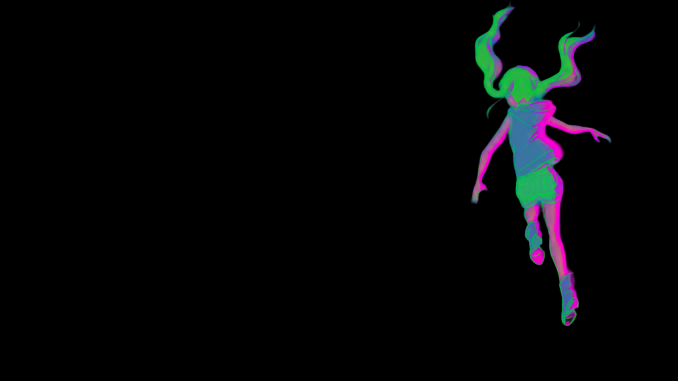

In [19]:
#compute difference
def compute_difference(bg_img, input_img):
    diff = cv2.absdiff(bg_img, input_img)
    return diff

difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

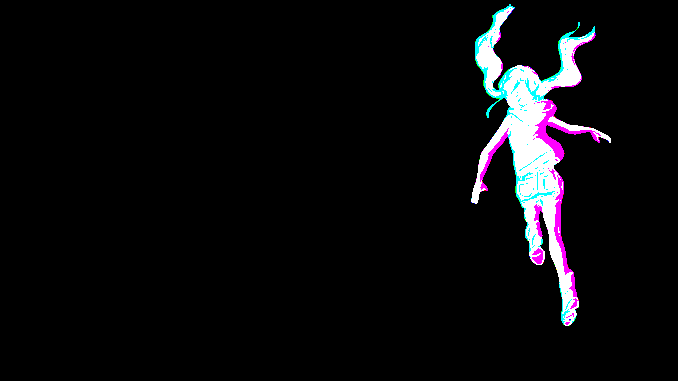

In [21]:
#compute binary mask
def compute_binary_mask(difference_single_channel):
  _, difference_binary = cv2.threshold(difference_single_channel, 25, 255, cv2.THRESH_BINARY)
  return difference_binary

binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

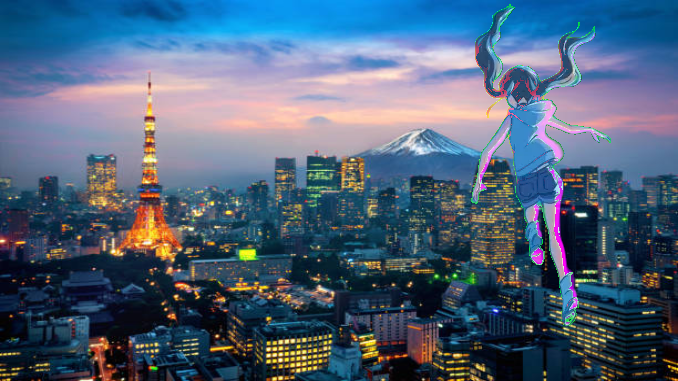

In [22]:
#replace background:
def replace_background(bg1_image, bg2_image, ob_image):
  difference_single_channel = compute_difference(bg1_image, ob_image)
  binary_mask = compute_binary_mask(difference_single_channel)
  output = np.where(binary_mask == 255, ob_image, bg2_image)
  return output

output = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(output)

# Excercise

In [24]:
vector = np.array([-2,4,9,21])
result = compute_vector_length(vector)
print(round(result ,2))

23.28


In [25]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])

result = compute_dot_product(v1, v2)
print(round(result,2))

4


In [26]:
x = np.array([[1,2],[3,4]])
y = np.array([1,2])

print(x.dot(y))

[ 5 11]


In [27]:
x = np.array([[-1,2],
              [3, -4]])
y = np.array([1,2])
print(x@y)

[ 3 -5]


In [28]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0,2,1])

print(matrix_multi_vector(m,v))

[3 1]


In [29]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])

print(matrix_multi_matrix(m1,m2))

[[  6  -1]
 [-16 -10]]


In [31]:
m1 = np.eye(3)
m2 = np.array([[1,1,1], [2,2,2], [3,3,3]])

result = m1@m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [33]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1,4))[0]

m2 = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
result = m1@m2
print(result)

[5. 5. 5. 5.]


In [38]:
m1 = np.array([[1,2],[3,4]])
m1 = np.reshape(m1, (-1,4), "F")[0]

m2 = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
result = m1@m2
print(result)

[29 29 29 29]


In [40]:
m1 = np.array([[-2, 6], [8, -4]])
print(matrix_inverse(m1))

[[0.1  0.15]
 [0.2  0.05]]


In [42]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [43]:
x = np.array([1,2,3,4])
y = np.array([1,0,3,0])

result = compute_cosine(x,y)
print(round(result,3))

0.577
